# SMI data analysis with Python
**Authors**:<br>Marlon Marzer, marlon.marzer@stud.hslu.ch<br>Dario Schürch, dario.schuerch@hslu.ch<br>
**Lecturer**:<br>Simon Broda, simon.broda@hslu.ch

In [ ]:
https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

#Cheatsheet wie man Folie auf Jupyter erstellt, nur als Hilfe

## Kurzer Beschrieb was wir im File machen? / Inhaltsverzeichnis?

Idee: Vergleich von im SMI während der Finanazkrise und der COVID-Pandemie 


- X
- X

### Get the Data

In [47]:
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

start = datetime(2004,1,1)
end = datetime.today()
SMI= yf.download("^SSMI", start, end)

SMI.to_csv("SMI_ALL.csv",index = False)



[*********************100%***********************]  1 of 1 completed


In [48]:
#Erst noch bisschen zeigen, dass wir mit Daten umgehen können mit groupby oder so

# Moving Average of ......... 50 Day / 200 Day Base 2004-2022

Text(0.5, 1.0, 'Moving Average of a 50 and 200 Day Base SMI 2004-2022')

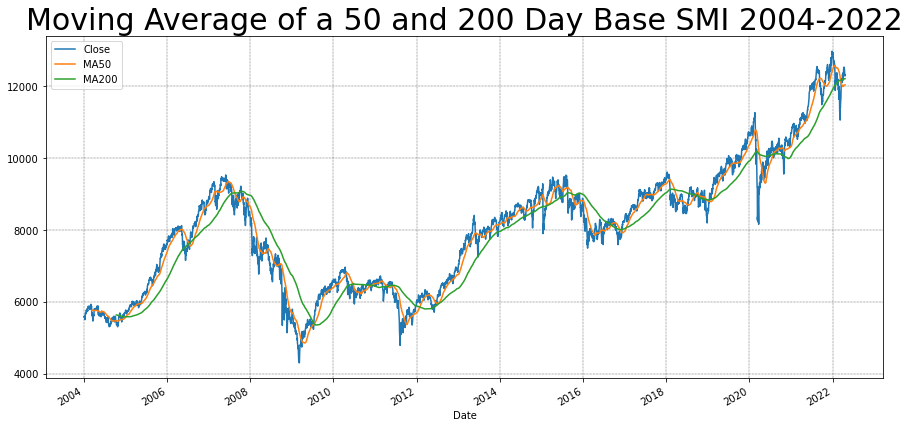

In [49]:
#Gleitender Mittelwert 50 / 200 2004 - 2022
SMI ["MA50"] = SMI["Close"].rolling(50).mean()
SMI ["MA200"] = SMI["Close"].rolling(200).mean()
SMI["Close"].plot(figsize = (15,7))
SMI["MA50"].plot()
SMI["MA200"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()
plt.title("Moving Average of a 50 and 200 Day Base SMI 2004-2022", fontsize = 30)

# Moving Average of ......... 50 Day / 200 Day Base 2008-2010

### Get the Data

In [50]:
start = datetime(2008,1,1)
end = datetime(2010,12,12)
SMI_08= yf.download("^SSMI", start, end)
SMI_08.to_csv("SMI_08.csv",index = False)


[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Moving Average of a 50 and 200 Day Base SMI 2008-2010')

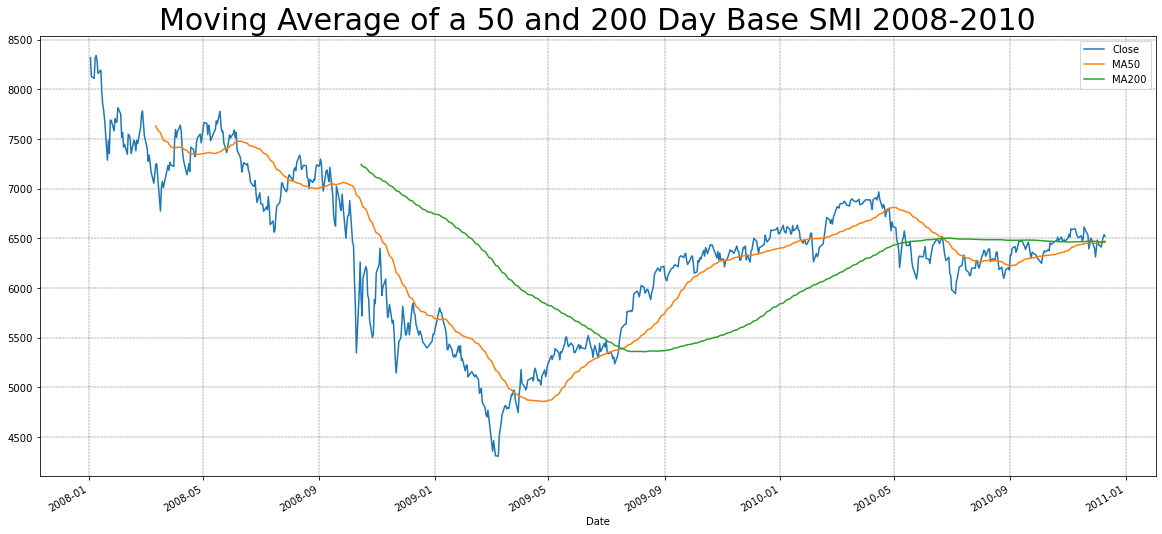

In [51]:
SMI_08 ["MA50"] = SMI_08["Close"].rolling(50).mean()
SMI_08 ["MA200"] = SMI_08["Close"].rolling(200).mean()
SMI_08["Close"].plot(figsize = (20,9))
SMI_08["MA50"].plot()
SMI_08["MA200"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()
plt.title("Moving Average of a 50 and 200 Day Base SMI 2008-2010", fontsize = 30)

## Mittelwert als Kennzahl 2020-2022 als Kennzahl

In [52]:
print(SMI_08["Close"].mean())

6356.967849915286


# Moving Average of ......... 50 Day / 200 Day Base 2020-2020

### Get the Data

In [53]:
start = datetime(2020,1,1)
end = datetime.today()
SMI_20= yf.download("^SSMI", start, end)
SMI_20.to_csv("SMI_08.csv",index = False)


[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Moving Average of a 50 and 200 Day Base SMI 2020-2022')

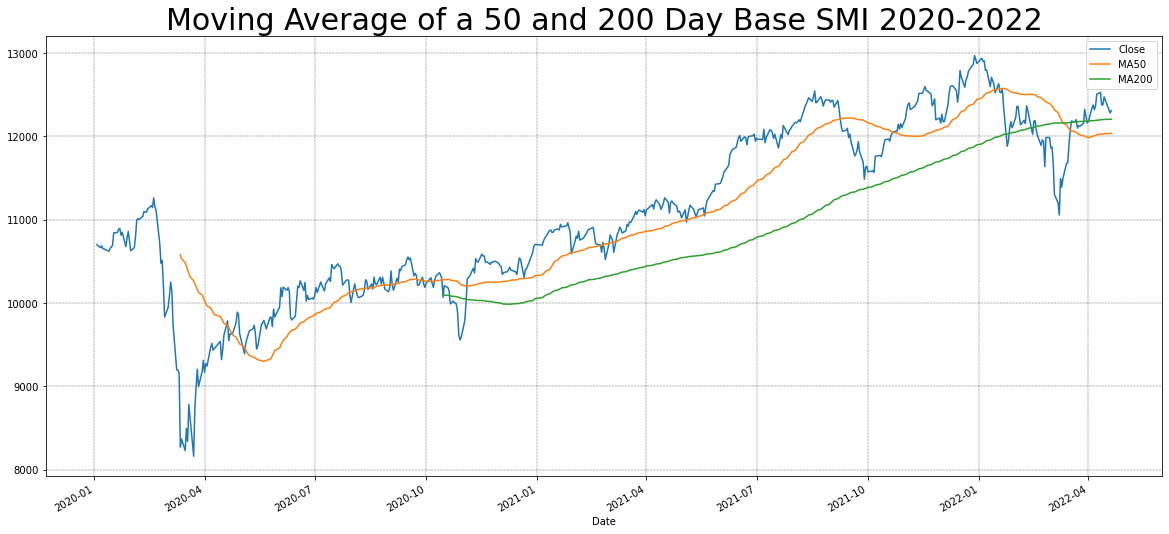

In [54]:
SMI_20 ["MA50"] = SMI_20["Close"].rolling(50).mean()
SMI_20 ["MA200"] = SMI_20["Close"].rolling(200).mean()
SMI_20["Close"].plot(figsize = (20,9))
SMI_20["MA50"].plot()
SMI_20["MA200"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.legend()
plt.title("Moving Average of a 50 and 200 Day Base SMI 2020-2022", fontsize = 30)

## Mittelwert als Kennzahl 2020-2022 als Kennzahl

In [55]:
# gibt den Mittelwert aus
print(SMI_20["Close"].mean())

11078.752910874562


# Comparison Volatility SMI 2008-2010 and SMI 2020-2022

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Volatility SMI 2008-2010 and SMI 2020-2022')

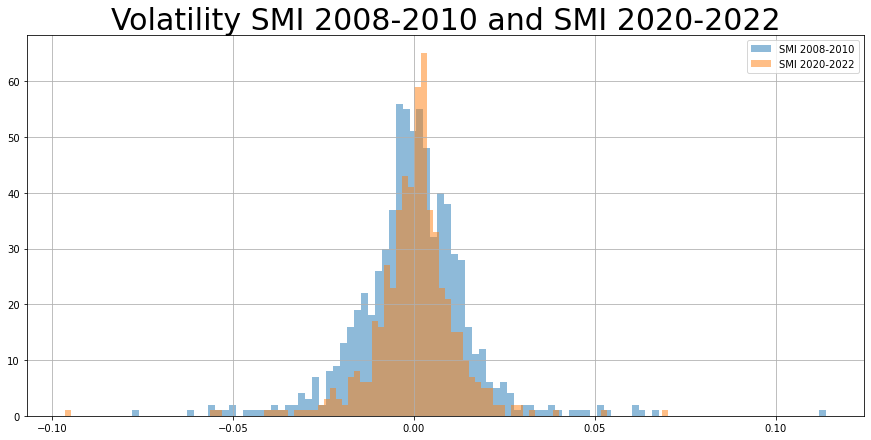

In [56]:
start = datetime(2008,1,1)
end = datetime(2010,12,12)
SMI_08= yf.download("^SSMI", start, end)

start = datetime(2020,1,1)
end = datetime.today()
SMI_20= yf.download("^SSMI", start, end)

SMI_20.to_csv("SMI_20.csv",index = False)

SMI_08["returns"] = (SMI_08["Close"]/SMI_08["Close"].shift(1)) -1
SMI_20["returns"] = (SMI_20["Close"]/SMI_20["Close"].shift(1)) -1
SMI_08["returns"].hist(bins = 100, label = "SMI 2008-2010", alpha = 0.5, figsize = (15,7))
SMI_20["returns"].hist(bins = 100, label = "SMI 2020-2022", alpha = 0.5)
plt.legend()
plt.title("Volatility SMI 2008-2010 and SMI 2020-2022", fontsize = 30)

# Comparison standard deviation SMI 2008-2010 and SMI 2022-2022

In [57]:
std_SMI_08= (SMI_08["Close"].std())
std_SMI_20= (SMI_20["Close"].std())
print(std_SMI_08)
print(std_SMI_20)



769.6229093477947
1022.959880191776


# Reflection

# Refernces
yfinance